In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Saute-Mouton

Soit le problème ($c$ est une constante positive)

$$
    \begin{align*}
        \partial_{tt}u - c^2\partial_{xx}u &= 0, &&x \in [-2, 2], &&t \in [0, T],
        u(x, 0) &= u0(x), \\
        \partial_t u(x, 0) &= u_1(x), \\
        u(-2, t) = u(2, t) &= 0.
    \end{align*}
$$

On suppose que $u_0$ et $u_1$ sont à support dans $[-1, 1]$.


## 1. Solution exacte

Calculons la solution exacte de ce problème pour $t \in \left[0, \frac{1}{c}\right]$.

Posons $a = x - ct$ et $b = x + ct$.  
Ainsi $x = \frac{a + b}{2}$ et $t = \frac{b-a}{2c}$.

$$
    \begin{align*}
        \frac{\partial}{\partial x} = \frac{\partial}{\partial a}\frac{\partial a}{\partial x} + \frac{\partial}{\partial b}\frac{\partial b}{\partial x} &= \frac{\partial}{\partial a} + \frac{\partial}{\partial b} \\
        \frac{\partial}{\partial t} = \frac{\partial}{\partial a}\frac{\partial a}{\partial t} + \frac{\partial}{\partial b}\frac{\partial b}{\partial t} &= -c\frac{\partial}{\partial a} + c\frac{\partial}{\partial b}
    \end{align*}
$$

Soit $v$ tel que $v(a, b) = u(x, t)$. Puisque $\frac{\partial^2}{\partial t^2}u - c^2 \frac{\partial^2}{\partial x^2}u = 0$,

$$
    \begin{align*}
        \left(-c\frac{\partial}{\partial a} + c\frac{\partial}{\partial b}\right)\left(-c\frac{\partial}{\partial a} + c\frac{\partial}{\partial b}\right) v
            &=  c^2\left(\frac{\partial}{\partial a} + \frac{\partial}{\partial b}\right)\left(\frac{\partial}{\partial a} + \frac{\partial}{\partial b}\right) v \\
        c^2\left(\frac{\partial^2 v}{\partial a^2} + \frac{\partial^2 v}{\partial b^2} - 2\frac{\partial^2 v}{\partial a \partial b}\right)
            &= c^2\left(\frac{\partial^2 v}{\partial a^2} + \frac{\partial^2 v}{\partial b^2} + 2\frac{\partial^2 v}{\partial a \partial b}\right) \\
        \frac{\partial^2 v}{\partial a \partial b} = 0
    \end{align*}
$$

donc, $\frac{\partial v}{\partial a} = f(a)$ et $\frac{\partial v}{\partial b} = g(b)$.  
Ainsi, $v(a, b) = F(a) + G(b)$ et

$$
    \boxed{u(x, t) = F(x - ct) + G(x + ct)}
$$

Puis

$$
    \begin{cases}
        u_0(x) &= F(x) + G(x) \\
        u_1(x) &= -cF'(x) + cG'(x)
    \end{cases}
$$

Supposons que $u_0$ et $u_1$ sont à support compact ainsi que $F$ et $G$.

$$
    \int_{-\infty}^x u_1(s) \mathrm{d}s = -cF(x) + cG(x)
$$

$$
    \begin{align*}
        F(x) &= \frac{1}{2}\left(u_0(x) - \frac{1}{c} \int_{-\infty}^x u_1(s)\mathrm{d} s \right) \\
        G(x) &= \frac{1}{2} \left(u_0(x) + \frac{1}{c} \int_{-\infty}^x u_1(s)\mathrm{d} s \right) \\
        u(x, t) &= F(x - ct) + G(x + ct) \\
                &= \frac{1}{2} \left(u_0(x - ct) + u_0(x + ct) - \frac{1}{c} \int_{-\infty}^{x - ct} u_1(s)\mathrm{d} s + \frac{1}{c} \int_{-\infty}^{x + ct} u_1(s)\mathrm{d} s \right) \\
                &= \frac{1}{2} u_0(x - ct) + \frac{1}{2} u_0(x + ct) + \frac{1}{2c} int_{x-ct}^{x + ct} u_1(s)\mathrm{d} s
    \end{align*}
$$

$u_0$ et $u_1$ sont à support dans un compact $K \subset [-1, 1]$. À l'instant $t$, la solution est à support dans $K = [a, b]$. Donc,

$$
    \mathrm{supp} \, u(\cdot, t) \subset [a - ct, b + ct]
$$

Avant que la solution touche les bords $a - ct > -1$ et $b + ct < 1$, $t < \min \left(\frac{a+1}{c}, \frac{1-b}{c}\right)$ et la solution est valable. On en déduit que $\max t = \frac{1}{c}$.  
Après ce temps, la condition de Neumann modifie la solution (qui est valable en domaine infini).


## 2. Équations des ondes

On peut transformer l'équation des ondes en système d'équations de transport.

$$
    \begin{align*}
        w &= \begin{pmatrix} \partial_t u \\ \partial_x u \end{pmatrix} = \begin{pmatrix} w_1 \\ w_2 \end{pmatrix} \\
        \partial_t w &= \begin{pmatrix} \partial_{tt} u \\ \partial_x \partial_t u \end{pmatrix}
                    = \begin{pmatrix} c^2 \partial_{xx} u \\ \partial_x \partial_t u \end{pmatrix}
                    = \begin{pmatrix} c^2 \frac{\partial}{\partial_x} w_2 \\ \frac{\partial}{\partial_x} w_1 \end{pmatrix} \\
                   &= \frac{\partial}{\partial x} \begin{pmatrix} 0 &c^2 \\ 1 &0 \end{pmatrix} \begin{pmatrix} w_1 \\ w_2 \end{pmatrix}
    \end{align*}
$$

En posant
$A = \begin{pmatrix}
        0   &-c^2 \\
        -1  &0
     \end{pmatrix}$, on a

$$
    \frac{\partial}{\partial_t}w + \frac{\partial}{\partial_x} Aw = 0
$$

Et donc,

$$
    \boxed{\partial_t w + A \partial_x w = 0}
$$


## 3. Schéma décentré

Écrivons le schéma décentré associé à ce modèle. On utilisera la subdivision $x_i = -2 + i \Delta x$, $i = 0 \dots N + 1$, $\Delta x = 4/(N + 1)$. Les points $x_0$ et $x_{N+1}$ serviront à appliquer les conditions aux limites.

On diagonalise $A$

$$
    \mathrm{det}(A - \lambda \mathrm{I}) = \mathrm{det}\begin{pmatrix}
        -\lambda &-c^2 \\
        -1 &-\lambda
    \end{pmatrix} = \lambda^2 - c^2 = (\lambda - c)(\lambda + c)-
$$

$$
    \lambda_1 = -c, \; \lambda_2 = c.
$$

Maintenant que nous avons trouvé les valeurs propres de la matrice $A$, qui sont $\lambda_1 = -c$ et $\lambda_2 = c$, nous pouvons diagonaliser $A$ en utilisant ces valeurs propres.

Pour diagonaliser une matrice, nous avons besoin des vecteurs propres correspondants à chaque valeur propre. Pour $\lambda_1 = -c$, trouvons le vecteur propre $\mathbf{v}_1$ en résolvant l'équation $(A - \lambda_1 \mathrm{I})\mathbf{v}_1 = \mathbf{0}$ :

$$
\begin{pmatrix}
    0 & -c^2 \\
    -1 & 0
\end{pmatrix} \mathbf{v}_1 = \mathbf{0}
$$

En résolvant ce système d'équations, nous trouvons que le vecteur propre associé à $\lambda_1$ est $\mathbf{v}_1 = \begin{pmatrix} -c \\ 1 \end{pmatrix}$.

De manière similaire, pour $\lambda_2 = c$, trouvons le vecteur propre $\mathbf{v}_2$ en résolvant l'équation $(A - \lambda_2 \mathrm{I})\mathbf{v}_2 = \mathbf{0}$ :

$$
\begin{pmatrix}
    -2c & -c^2 \\
    -1 & -2c
\end{pmatrix} \mathbf{v}_2 = \mathbf{0}
$$

En résolvant ce système d'équations, nous trouvons que le vecteur propre associé à $\lambda_2$ est $\mathbf{v}_2 = \begin{pmatrix} c \\ 1 \end{pmatrix}$.

Maintenant que nous avons obtenu les valeurs propres et les vecteurs propres, nous pouvons former la matrice de diagonalisation $D$ :

$$
D = \begin{pmatrix}
    \lambda_1 & 0 \\
    0 & \lambda_2
\end{pmatrix} = \begin{pmatrix}
    -c & 0 \\
    0 & c
\end{pmatrix}
$$

Et la matrice de changement de base $P$ en plaçant les vecteurs propres en colonnes :

$$
P = \begin{pmatrix}
    \mathbf{v}_1 & \mathbf{v}_2
\end{pmatrix} = \begin{pmatrix}
    -c & c \\
    1 & 1
\end{pmatrix}
$$

Maintenant, nous pouvons vérifier la diagonalisation en calculant $P^{-1}AP$ pour voir si cela donne bien la matrice diagonale $D$ :

$$
P^{-1}AP = \begin{pmatrix}
    -c & c \\
    1 & 1
\end{pmatrix}^{-1}
\begin{pmatrix}
    -c^2 & -c^2 \\
    -1 & -c^2
\end{pmatrix}
\begin{pmatrix}
    -c & c \\
    1 & 1
\end{pmatrix}
$$

Après les calculs, nous devrions obtenir :

$$
P^{-1}AP = \begin{pmatrix}
    c & 0 \\
    0 & -c
\end{pmatrix} = D
$$

Comme prévu, nous avons bien obtenu la matrice diagonale $D$ à partir de la diagonalisation de la matrice $A$.

Soit $\displaystyle y = \begin{pmatrix} y_1 \\ y_2 \end{pmatrix}$ tel que $w = Py$

$$
    \begin{align*}
        \partial_t Py + AP \partial_x y &= 0 \\
        \Rightarrow \partial_t y + D \partial_x y &= 0
    \end{align*}
$$

Les équations discrétisées sont données par :

$$
\begin{cases}
    \frac{\partial y_1}{\partial t} - c \frac{\partial y_1}{\partial x} = 0 \\
    \frac{\partial y_2}{\partial t} + c \frac{\partial y_2}{\partial x} = 0
\end{cases}
$$

Puis,

$$
    \begin{cases}
        y_1(x, t) = y_1(x + ct, 0) \\
        y_2(x, t) = y_2(x - ct, 0)
    \end{cases}
$$

Les relations entre les solutions discrètes à l'instant $n$ et les solutions continues sont données par :

$$w_i^n \simeq w(x_i, n \Delta t), \quad Py_i^n = w_i^n,$$

où $w_i^n$ représente l'approximation discrète de la solution au point $x_i$ et à l'instant $n \Delta t$, et $Py_i^n$ est le produit matrice-vecteur qui transforme les solutions discrètes dans la base des vecteurs propres.

On pose $D^+ = \begin{pmatrix} 0 & 0 \\ 0 & c \end{pmatrix}$ et $\;D^- = \begin{pmatrix} -c & 0 \\ 0 & c \end{pmatrix}$.

$$
    \frac{y^{n+1}_i - y^n_i}{\Delta t} + D^+ \frac{y^n_i - y^n_{i+1}}{\Delta x} + D^- \frac{y^n_{i+1} - y^n_i}{\Delta x} = 0
$$

Puisque $y = P^{-1} w$,

$$
    \frac{w^{n+1}_i - w^n_i}{\Delta t} + PD^+P^{-1} \frac{w^n_i - w^n_{i+1}}{\Delta x} + PD^-P^{-1} \frac{w^n_{i+1} - w^n_i}{\Delta x} = 0
$$

On pose $A^+ = PD^+P^{-1}$ et $\;A^- = PD^-P^{-1}$

$$
    A^+ = \frac{1}{2} \begin{pmatrix} c & -c^2 \\ -1 & c \end{pmatrix} \; \text{ et } \; A^- = \frac{1}{2} \begin{pmatrix} -c & -c^2 \\ -1 & -c \end{pmatrix}
$$

On obtient

$$
    \begin{align*}
        w^{n+1}_i &= w^n_i + \frac{\Delta t}{\Delta x} \left(-A^+ \left(w^n_i - w_{i-1}^n\right) - A^- \left(w^n_{i+1} - w^n_i\right)\right) \\
                  &= w^n_i - \frac{\Delta t}{\Delta x} \left(A^+ w^n_i + A^- w^n_{i+1} - (A^+ w^n_{i-1} + A^- w^n_i)\right)
    \end{align*}
$$

Le terme $A^+ \frac{w_i^n - w_{i-1}^n}{\Delta x}$ représente l'approximation de la dérivée spatiale de la première composante du vecteur $w$ (correspondant à $y_1$) et le terme $A^- \frac{w_{i+1}^n - w_i^n}{\Delta x}$ représente l'approximation de la dérivée spatiale de la deuxième composante du vecteur $w$ (correspondant à $y_2$).

Le schéma décentré nécessite une condition initiale $w_i^0$ pour commencer l'itération temporelle. Cette condition initiale est donnée par :

$$
w_i^0 = \begin{pmatrix} u_1(x_i) \\ u_0'(x_i) \end{pmatrix}
$$

où $u_1(x_i)$ est la valeur initiale de la fonction $u$ au point $x_i$ et $u_0'(x_i)$ est la dérivée spatiale de la fonction $u$ au point $x_i$ à l'instant initial.

Pour récupérer la solution continue $u(x)$ à partir de la solution discrète $w_i^n$, on peut utiliser l'intégration numérique. Une méthode simple consiste à utiliser la méthode des trapèzes. On peut approcher $u(x_i)$ comme suit :

$$
u(x_i) \simeq \sum_{j=0}^{i} \frac{w_{j+1}^n + w_j^n}{2} \Delta x
$$

où la somme est effectuée sur tous les points de la discrétisation spatiale jusqu'au point $x_i$. Cette formule donne une approximation de l'intégrale de la dérivée spatiale de $u$ à l'instant $n \Delta t$. En utilisant cette méthode pour tous les instants de temps $n$, on peut obtenir une approximation de la fonction $u(x)$ dans l'intervalle de temps désiré.

Il est important de noter que le schéma décentré est une approximation numérique et que la précision de la solution dépend du choix des pas de temps et d'espace ($\Delta t$ et $\Delta x$) ainsi que de la qualité de la condition initiale. Pour des résultats précis, il peut être nécessaire de diminuer les pas de temps et d'espace, mais cela augmentera également le coût computationnel de la résolution numérique.


## 4. Vérification numérique

Vérifions numériquement que notre schéma converge vers la solution exacte du problème.

Ici, nous choisissons $u_1(x) = 0$ et $u_0'(x) = \begin{cases} \pi \cos(\pi x) && \text{si } -1 \leqslant x \leqslant 1 \\ 0 && \text{sinon} \end{cases}$


In [2]:
def initial_derivative(x):  # u0'(x)
    if -1 <= x <= 1:
        return np.pi * np.cos(np.pi * x)
    return 0

def initial_condition(x):  # u1(x)
    return 0

#### Solution exacte

$$
    \begin{align*}
        u(x, t) &= u_0(x - ct) / 2 + u_0(x + ct) / 2 + \int_{x - ct}^{x + ct} u_1(s) \mathrm{d}s \\
                &= (u_0(x - ct) + u_0(x + ct)) / 2 \\
                &= \begin{cases} \sin(\pi(x - ct)) / 2 && \text{si } x \in [-1+ct, 1+ct] \\ 0 && \text{sinon} \end{cases} \\
                    &\phantom{= }+ \begin{cases} \sin(\pi(x + ct)) / 2 && \text{si } x \in [-1-ct, 1-ct] \\ 0 && \text{sinon} \end{cases}
    \end{align*}
$$

On remarque que si $t = \frac{1}{c}$,

$$
    u(x, 1/c) = -sin(\pi x) / 2 \qquad -2 \leqslant x \leqslant 2.
$$


In [3]:
def exact_solution(x, c, t):  # u(x, t)
    res = 0

    if -1 <= x - c * t <= 1:
        res += np.sin(np.pi * (x - c * t)) / 2

    if -1 <= x + c * t <= 1:
        res += np.sin(np.pi * (x + c * t)) / 2

    return res

In [4]:
def solve_centered_wave_equation(initial_derivative, initial_condition, c, t_max, N, CFL):
    dx = 4 / (N + 1)
    dt = CFL * dx / c
    t = 0
    xi = np.linspace(-2, 2, N+1)

    w = np.zeros((2, N + 1))  # w
    w[0, 1:-1] = [initial_condition(x) for x in xi[1: -1]]  # w1
    w[1, 1:-1] = [initial_derivative(x) for x in xi[1: -1]]  # w2

    Ap = np.array([[c, -c * c], [-1, c]]) / 2  # A+
    Am = np.array([[-c, -c * c], [-1, -c]]) / 2  # A-

    while t < t_max:
        t += dt
        temp = np.copy(w)

        w -= dt / dx * (Ap - Am) @ temp
        w[:, 1:] += dt / dx * Ap @ temp[:, :-1]
        w[:, :-1] -= dt / dx * Am @ temp[:, 1:]

    u = [w[1, 0] * dx]  # Calcul de u

    for ux in w[1, 1:]:  # par la méthode des rectangles.
        u += [u[-1] + dx * ux]

    return np.array(u)

Calculons et affichons le résultat pour $N = 1000$ et $t = 1/c$.

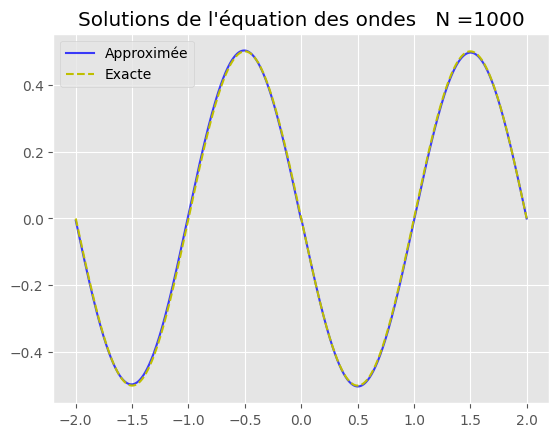

In [5]:
N = 1000
CFL = 1
c = 1
t_max = 1 / c
xi = np.linspace(-2, 2, N+1)

u_approximated = solve_centered_wave_equation(initial_derivative, initial_condition, c, t_max, N, CFL)
u_exact = np.array([exact_solution(x, c, t_max) for x in xi])

plt.plot(xi, u_approximated, 'b', label='Approximée', alpha=0.75)
plt.plot(xi, u_exact, 'y--', label='Exacte')
plt.title('Solutions de l\'équation des ondes   N ={0}'.format(N))
plt.legend()
plt.show()

Vérifions que le schéma converge.

In [6]:
def compute_error(N, r):
    xi = np.linspace(-2, 2, N+1)
    u_approximated = solve_centered_wave_equation(initial_derivative, initial_condition, c, t_max, N, CFL)
    u_exact = np.array([exact_solution(x, c, t_max) for x in xi])

    error = np.linalg.norm(u_exact - u_approximated, r) * 4 / (N + 1)

    return error

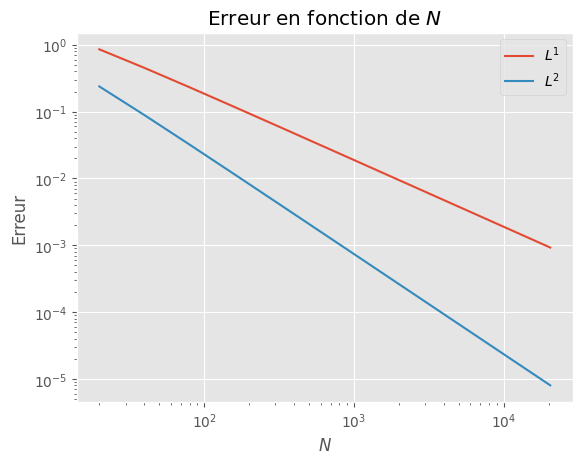

Schéma d'ordre 0.99 en erreur L1
Schéma d'ordre 1.49 en erreur L2


In [7]:
allN = np.array([20*2 ** i for i in range(11)])
errL1 = [compute_error(n, 1) for n in allN]
errL2 = [compute_error(n, 2) for n in allN]

plt.loglog(allN, errL1, label='$L^1$')
plt.loglog(allN, errL2, label='$L^2$')
plt.title(r'Erreur en fonction de $N$')
plt.xlabel(r'$N$')
plt.ylabel(r'Erreur')
plt.legend()
plt.show()

order_L1 = -np.polyfit(np.log(allN), np.log(errL1), 1)[0]
order_L2 = -np.polyfit(np.log(allN), np.log(errL2), 1)[0]

print("Schéma d'ordre {0:4.2f} en erreur L1".format(order_L1))
print("Schéma d'ordre {0:4.2f} en erreur L2".format(order_L2))

## 5. Schéma saute-mouton

Écrivons le schéma saute-mouton pour résoudre l'équation des ondes.  
On vérifiera numériquement la convergence du schéma et que la condition de stabilité est $c \Delta t \leqslant \Delta x$.

On pose $\displaystyle \Delta x = \frac{4}{N}$ et $x_i = i \Delta x$ pour $i$ de 1 à $N-1$.  
Ainsi,

$$
    \begin{align*}
        u^n_i &\simeq u(x_i, n\Delta t) \\
        u^n_0 = u^n_N &= 0 \\
        \frac{\partial^2}{\partial_x^2}u(x_i, t_n) &\simeq \frac{u^n_{i+1} - 2 u^n_i + u^n_{i-1}}{\Delta x^2} \\
        \frac{\partial^2}{\partial_t^2}u(x_i, t_n) &\simeq \frac{u^{n+1}_i - 2 u^n_i + u^{n-1}_i}{\Delta t^2}
    \end{align*}
$$

Donc,

$$
    \frac{u^{n+1}_i - 2 u^n_i + u^{n-1}_i}{\Delta t^2} + \frac{-c^2 u^n_{i+1} + 2 c^2 u^n_i - c^2 u^n_{i-1}}{\Delta x^2} = 0
$$

En posant $\displaystyle \beta = \frac{c \Delta t}{\Delta x}$, on obtient

$$
    \boxed{u^{n+1}_i = -u^{n+1}_i + 2 \left(1 - \beta^2\right) u^n_i + \beta^2 \left(u^n_{i+1} + u^n_{i-1}\right)}
$$

Pour calculer $u$ à l'étape $n + 1$, on a besoin des étapes $n$ et $n - 1$,

$$
    \begin{align*}
        u^0_i &= u(x_i) \\
        u_i &\simeq u(x_i, \Delta t) = u(x_i, 0) + \Delta t u_1(x_i) + o(\Delta t^2) \\
        u^1_i &= u_0(x_i) + \Delta t u_1(x_i)
    \end{align*}
$$

On pose
$ A = \begin{pmatrix}
    2   & -1    &       &       &   \\
    -1  & 2     & -1    &       &   \\
        &\ddots &\ddots &\ddots &   \\
        &       & -1    & 2     & -1\\
        &       &       & -1    & 2
\end{pmatrix}$ et $U^n = \begin{pmatrix} u^n_1 \\ \vdots \\ u^n_{N-1} \end{pmatrix}$, et donc,

$$
    \begin{align*}
        U^{n+1} &= -U^{n-1} + 2U^n - \beta^2 A U^n \\
                &= -U^{n-1} + \left(2 \mathrm{I} - \beta^2 A\right) U^n
    \end{align*}
$$

In [8]:
import scipy.sparse as spsp


def FrogLeap(u0, u1, c, t_max, N, CFL):
    dx = 4 / N  # Δx
    dt = CFL * dx / c  # Δt
    xi = np.linspace(-2 + dx, 2 - dx, N - 1)  # Discrétisation spatiale
    beta = c * dt / dx  # β

    # Construction de la matrice K
    diagA = 2 * np.ones(N - 1)
    supA = -np.ones(N - 2)
    lowA = -np.ones(N - 2)
    A = spsp.diags([lowA, diagA, supA], [-1, 0, 1])  # Matrice A
    I = spsp.identity(N - 1)  # Matrice identité
    K = 2 * I - beta * beta * A  # Matrice K = 2I - β²A

    Um = np.array([u0(x) for x in xi])  # Un-1 = U0
    U = np.array([u0(x) + dt * u1(x) for x in xi])  # Un = U1

    t = dt
    while t <= t_max:
        temp = np.copy(U)
        U = -Um + K @ U
        Um = temp
        t += dt

    return U, xi

In [9]:
def u0(x):
    if -1 <= x <= 1:
        return np.sin(np.pi * x)
    
    return 0

Calculons et affichons le résultat pour $N = 1000$ et $t = 1 / c$.

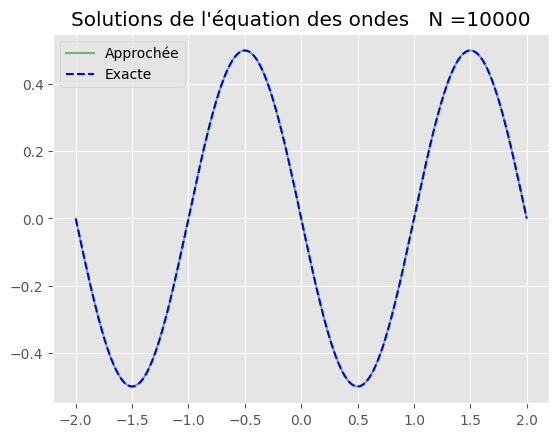

In [10]:
N = 10000
CFL = 0.95
c = 1
t_max = 1 / c

u_a, xi = FrogLeap(u0, initial_condition, c, t_max, N, CFL)
u_e = np.array([exact_solution(x, c, t_max) for x in xi])

plt.plot(xi, u_a, 'g', label='Approchée', alpha=0.5)
plt.plot(xi, u_e, 'b--', label='Exacte')
plt.title('Solutions de l\'équation des ondes   N ={0}'.format(N))
plt.legend()
plt.show()

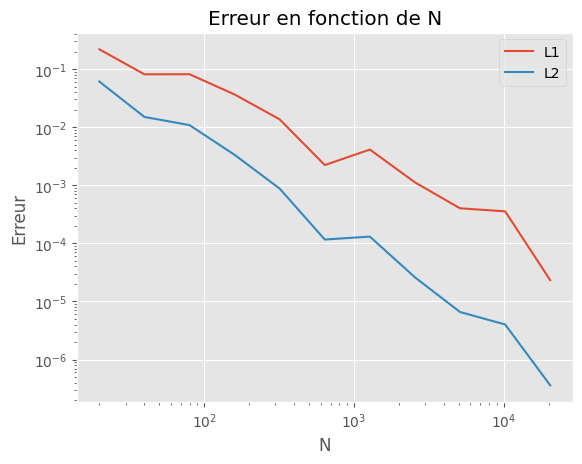

Schéma d'ordre 1.20 en erreur L1
Schéma d'ordre 1.66 en erreur L2


In [11]:
def erreurFL(N, r):
    u_a, xi = FrogLeap(u0, initial_condition, c, t_max, N, CFL)
    u_e = np. array([exact_solution(x, c, t_max) for x in xi])
    error = np.linalg.norm(u_e - u_a, r) * 4 / N

    return error


allN = np.array([10 * 2 ** i for i in range(1, 12)])
FLerrL1 = [erreurFL(n, 1) for n in allN]
FLerrL2 = [erreurFL(n, 2) for n in allN]

plt.loglog(allN, FLerrL1, label='L1')
plt.loglog(allN, FLerrL2, label='L2')
plt.title(r'Erreur en fonction de N')
plt.xlabel(r'N')
plt.ylabel(r'Erreur')
plt.legend()
plt.show()

order_L1 = -np.polyfit(np.log(allN), np.log(FLerrL1), 1)[0]
order_L2 = -np.polyfit(np.log(allN), np.log(FLerrL2), 1)[0]
print("Schéma d'ordre {0:4.2f} en erreur L1".format(order_L1))
print("Schéma d'ordre {0:4.2f} en erreur L2".format(order_L2))

Dans notre code, nous avons initialisé $\Delta t$ à `CFL`$\Delta x / c$, donc si `CFL` > 1 alors $c \Delta t > \Delta x$. Observons ce qu'il se passe lorsque cela se produit.

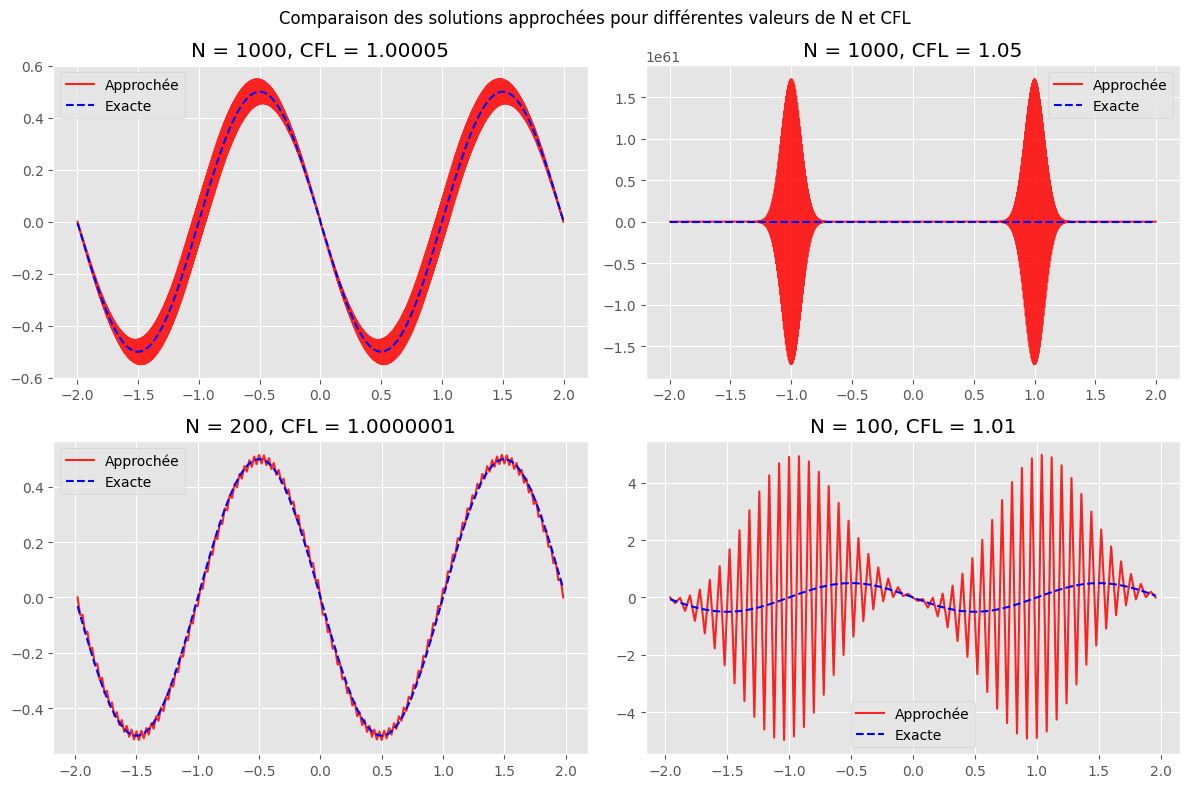

In [12]:
N_values = [1000, 1000, 200, 100]
CFL_values = [1.00005, 1.05, 1.0000001, 1.01]
c = 1
t_max = 1 / c

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Comparaison des solutions approchées pour différentes valeurs de N et CFL')

for i in range(4):
    N = N_values[i]
    CFL = CFL_values[i]

    u_a, xi = FrogLeap(u0, initial_condition, c, t_max, N, CFL)
    u_e = np.array([exact_solution(x, c, t_max) for x in xi])

    row = i // 2
    col = i % 2

    axs[row, col].plot(xi, u_a, 'r', label='Approchée', alpha=0.85)
    axs[row, col].plot(xi, u_e, 'b--', label='Exacte')
    axs[row, col].set_title('N = {0}, CFL = {1}'.format(N, CFL))
    axs[row, col].legend()

plt.tight_layout()
plt.show()

On observe nettement que lorsque `CFL` > 1, même de très peu, le schéma diverge et que le phénomène s'accentue lorsque `CFL` augmente.

Lorsque le nombre `CFL` dépasse 1, le schéma numérique devient instable, et cela peut conduire à des solutions qui divergent, c'est-à-dire qui "explosent" ou présentent des oscillations non-physiques.

Lorsque le nombre `CFL` dépasse 1, cela signifie que la vitesse des ondes dans la discrétisation numérique est supérieure à la vitesse réelle des ondes dans le problème physique. Cela peut provoquer des effets numériques indésirables, car l'information peut se propager trop rapidement dans le domaine numérique et conduire à des instabilités.

Pour éviter ces problèmes d'instabilité, il est important de choisir des valeurs de `CFL` inférieures à 1, généralement entre 0 et 1. Une valeur couramment utilisée est `CFL` = 0.5, qui garantit une bonne stabilité pour de nombreux schémas numériques.

## 6. Conclusion

Les ordres de convergence indiquent que le schéma Saute-Mouton (Leapfrog) est plus précis que le schéma décentré (Upwind) pour les deux erreurs d'approximation, à la fois en L1 et en L2. Cela signifie que le schéma Leapfrog devrait converger plus rapidement vers la solution exacte et donner des résultats plus précis pour des discrétisations plus fines.

En réalité, le schéma décentré (upwind) est généralement considéré comme plus précis et stable que le schéma Saute-Mouton (leapfrog) pour la résolution numérique des équations aux dérivées partielles (EDP) hyperboliques, comme l'équation des ondes.

En termes de stabilité et de précision, le schéma décentré est généralement préféré pour les problèmes hyperboliques car il évite les oscillations indésirables et les instabilités numériques. Le schéma Saute-Mouton peut devenir instable pour certaines conditions de pas de temps et peut présenter des solutions numériques qui ne correspondent pas bien à la physique du problème.

Cependant, le choix du schéma numérique dépend également du type spécifique de problème que vous résolvez et de vos objectifs en termes de précision et d'efficacité. Il est donc important de tester différents schémas pour votre cas particulier et de choisir celui qui convient le mieux à vos besoins.